<a href="https://colab.research.google.com/github/arishma108/QuantumComputing/blob/master/IBM%20Quantum%20Challenge%202024/Lab3_Circuit_Knitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
### Install Qiskit and relevant packages, if needed

%pip install qiskit[visualization]==1.0.2
%pip install qiskit-ibm-runtime
%pip install qiskit-aer
%pip install qiskit-transpiler-service
%pip install graphviz
%pip install circuit-knitting-toolbox
%pip install qiskit-serverless -U
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 15.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=4e0176f94b7875bf8b9184fecfee84aedafe206da17b4bc965cd3e0a43d16b27
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-3d81puax
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-3d81puax
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 96253489893ffda0e53a23ad53ce5e6b992e63d2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.0 MB/s eta 0:00:00
  Using cached qiskit-1.0.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.6 MB)
INFO: pip is looking at multiple versions of qiskit-ibm-runtime to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 49.1 MB/s eta 0:00:00
  Created wh

In [5]:
%set_env QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86



env: QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86


In [6]:
import qc_grader

qc_grader.__version__

'0.18.12'

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_gate_map
from qiskit.quantum_info import SparsePauliOp

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from circuit_knitting.cutting import generate_cutting_experiments, cut_gates

In [8]:

# Setup the grader

from qc_grader.challenges.iqc_2024 import grade_lab3_ckt_ex1, grade_lab3_ckt_ex2

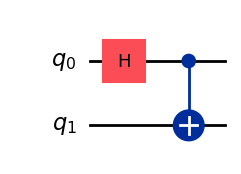

In [9]:
# create a bell pair
bell_state = QuantumCircuit(2)
bell_state.h(0)
bell_state.cx(0,1)
bell_state.draw("mpl")

In [10]:
IBMQ_TOKEN="6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86"

service = QiskitRuntimeService(
    channel="ibm_quantum",
    token=IBMQ_TOKEN
)
# Specify a system to use for transpilation, DO NOT change
backend = service.backend("ibm_kyoto")

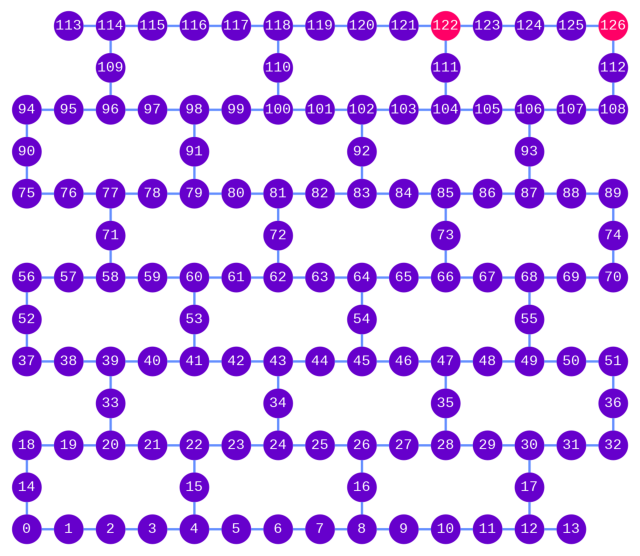

In [11]:
layout=[122, 126]
qubit_color = []
for i in range(127):
    if i in layout:
        qubit_color.append("#ff0066")
    else:
        qubit_color.append("#6600cc")
plot_gate_map(backend, qubit_color=qubit_color, qubit_size=60, font_size=25, figsize=(8,8))

Transpiled circuit depth:  27


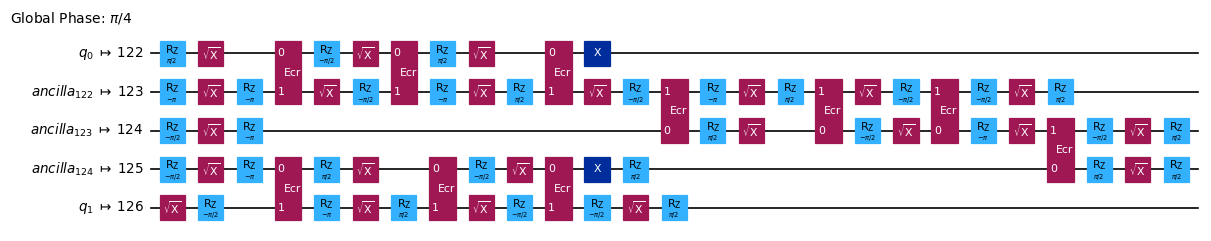

In [12]:
# transpile the circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=layout, seed_transpiler=0)
isa_qc = pm.run(bell_state)

# original circuit depth
isa_qc_depth = isa_qc.depth()
print(f"Transpiled circuit depth: ", isa_qc_depth)
isa_qc.draw("mpl", scale=0.6, idle_wires=False, fold=False)

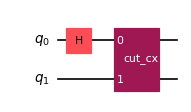

In [13]:
# Find the indices of the distant gates
cut_indices = [
    i
    for i, instruction in enumerate(bell_state.data)
    if {bell_state.find_bit(q)[0] for q in instruction.qubits} == {0, 1}
]

# Decompose distant CNOTs into TwoQubitQPDGate instances
qpd_circuit, bases = cut_gates(bell_state, cut_indices)

qpd_circuit.draw("mpl", scale=0.6)

In [14]:
observable = SparsePauliOp(["ZI"])

# Generate the sub-experiments and sampling coefficients
sub_experiments, coefficients = generate_cutting_experiments(
    circuits=qpd_circuit, observables=observable.paulis, num_samples=np.inf
)

Original circuit depth after transpile:  27
QPD sub-experiment depth after transpile:  7
Number of sub-experiments: 6


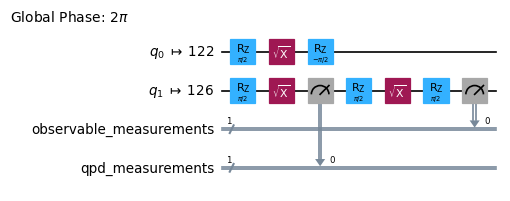

In [15]:
# Transpile the circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=layout, seed_transpiler=0)
isa_qpd_circuit = pm.run(sub_experiments[5])

# depth using circuit cutting
isa_qpd_depth = isa_qpd_circuit.depth()

print(f"Original circuit depth after transpile: ", isa_qc_depth)
print(f"QPD sub-experiment depth after transpile: ", isa_qpd_depth)
print(f"Number of sub-experiments:", len(sub_experiments))
isa_qpd_circuit.draw("mpl", scale=0.6, idle_wires=False, fold=False)

In [16]:

x = np.array([c.depth() for c in pm.run(sub_experiments)])
print(x)

[4 3 3 3 7 7]


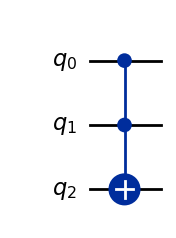

In [17]:
toffoli_layout = [122, 124, 126]

toffoli = QuantumCircuit(3)
toffoli.ccx(0, 1, 2)
toffoli.draw("mpl")

Transpiled circuit depth:  62


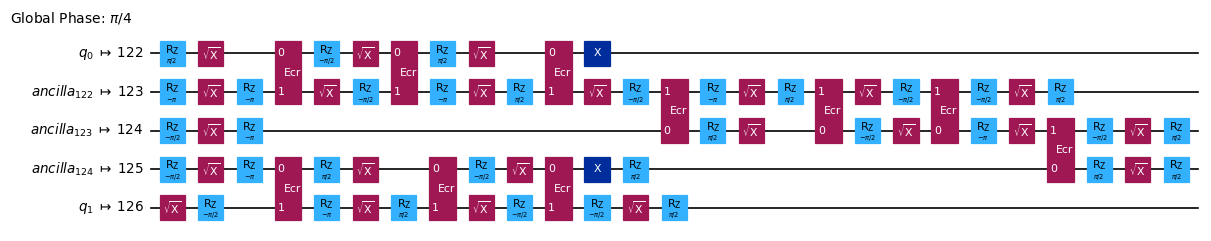

In [18]:

# To know the original circuit depth

### Write your code below here ###

# Transpile the circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=toffoli_layout, seed_transpiler=0)

isa_toffoli = pm.run(toffoli)

# Calculate original circuit depth
isa_toffoli_depth = isa_toffoli.depth()

### Don't change any code past this line ###
print(f"Transpiled circuit depth: ", isa_toffoli_depth)
isa_qc.draw("mpl", scale=0.6, idle_wires=False, fold=False)

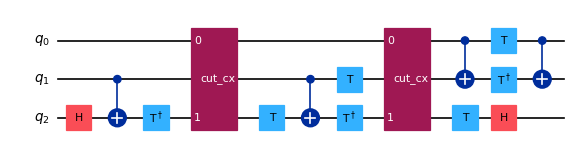

In [19]:
# To know the depth using circuit cutting

# Decompose the toffoli circuit
toffoli_ = toffoli.decompose()

### Write your code below here ###
# Find the indices of the distant gates
gates_connecting_to_cut = {0,2} # Hint: Expected type: set {int, int}. Docs: https://docs.python.org/3/tutorial/datastructures.html#sets

cut_indices =[
    i
    for i, instruction in enumerate(toffoli_.data)
    if {toffoli_.find_bit(q)[0] for q in instruction.qubits} == gates_connecting_to_cut
]

# Decompose distant CNOTs into TwoQubitQPDGate instances
qpd_circuit, bases = cut_gates(toffoli_, cut_indices)



### Don't change any code past this line ###

qpd_circuit.draw("mpl", scale=0.6)

Transpiled circuit depth:  62
QPD sub-experiment depth after transpile:  35
Number of sub-experiments: 36


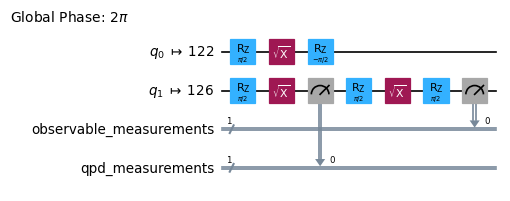

In [20]:
# set the observables
observable = SparsePauliOp(["ZZZ"])

### Write your code below here ###
# Generate the sub-experiments and sampling coefficients
sub_experiments, coefficients = generate_cutting_experiments(
    circuits=qpd_circuit, observables=observable.paulis, num_samples=np.inf
)

# Transpile the circuit
# Note: Use optimization_level=1 and seed_transpiler=0
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=toffoli_layout, seed_transpiler=0)

isa_qpd_toffoli =  pm.run(sub_experiments[0])


# Depth using circuit cutting
isa_qpd_toffoli_depth =isa_qpd_toffoli.depth()

### Don't change any code past this line ###
print(f"Transpiled circuit depth: ", isa_toffoli_depth)
print(f"QPD sub-experiment depth after transpile: ", isa_qpd_toffoli_depth)
print(f"Number of sub-experiments:", len(sub_experiments))
isa_qpd_circuit.draw("mpl", scale=0.6, idle_wires=False, fold=False)

In [21]:
### Write your code below here ###
# mean of the depth of all sub-experiments
depth_list = np.array([c.depth() for c in pm.run(sub_experiments)])
isa_qpd_toffoli_depth_mean =depth_list.mean()

### Don't change any code past this line ###
print(isa_qpd_toffoli_depth_mean)

35.333333333333336


In [22]:
# Submit your answer using following code

grade_lab3_ckt_ex1(gates_connecting_to_cut, isa_toffoli_depth, depth_list)
# Expected result type: set, int, numpy.ndarray

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


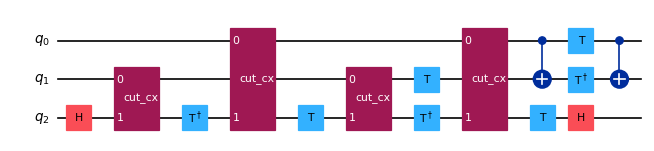

In [23]:
### Write your code below here ###
# Find the indices of the distant gates
gates_connecting_to_cut_1 = {0,2} # Hint: Expected type: set {int, int}
gates_connecting_to_cut_2 = {1,2} # Hint: Expected type: set {int, int}

cut_indices = [
    i
    for i, instruction in enumerate(toffoli_.data)
    if {toffoli_.find_bit(q)[0] for q in instruction.qubits} == gates_connecting_to_cut_1
    or {toffoli_.find_bit(q)[0] for q in instruction.qubits} == gates_connecting_to_cut_2
]

# Decompose distant CNOTs into TwoQubitQPDGate instances
qpd_circuit_2, bases = cut_gates(toffoli_, cut_indices)




### Don't change any code past this line ###
qpd_circuit_2.draw("mpl", scale=0.6)

QPD sub-experiment depth after transpile:  21
Number of sub-experiments: 1296


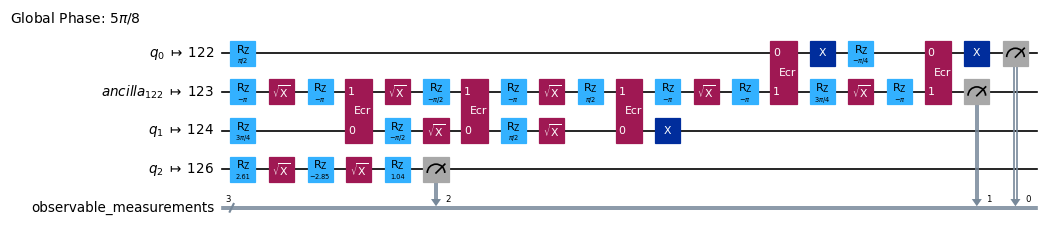

In [24]:
# set the observables
observable = SparsePauliOp(["ZZZ"])

### Write your code below here ###
# Generate the sub-experiments and sampling coefficients

sub_experiments_2, coefficients = generate_cutting_experiments(
    circuits=qpd_circuit_2, observables=observable.paulis, num_samples=np.inf
)

# Transpile the circuit
# Note: Use optimization_level=1 and seed_transpiler=0
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=toffoli_layout, seed_transpiler=0)

isa_qpd_circuit_2 = pm.run(sub_experiments_2[0])


# Depth using circuit cutting
isa_qpd_toffoli_depth_2 = isa_qpd_circuit_2.depth()


### Don't change any code past this line ###
print(f"QPD sub-experiment depth after transpile: ", isa_qpd_toffoli_depth_2)
print(f"Number of sub-experiments:", len(sub_experiments_2))
isa_qpd_circuit_2.draw("mpl", scale=0.6, idle_wires=False, fold=False)

In [25]:

# Submit your answer using following code

grade_lab3_ckt_ex2(gates_connecting_to_cut_1, gates_connecting_to_cut_2, sub_experiments_2)
# Expected result type: set, set, list[QuantumCircuit]

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [26]:
### Write your code below here ###
# mean of the depth of all sub-experiments
depth_list_2 = np.array([c.depth() for c in pm.run(sub_experiments_2)])
isa_qpd_toffoli_depth_2_mean = depth_list_2.mean()

### Don't change any code past this line ###
print(isa_qpd_toffoli_depth_2_mean)

21.246913580246915


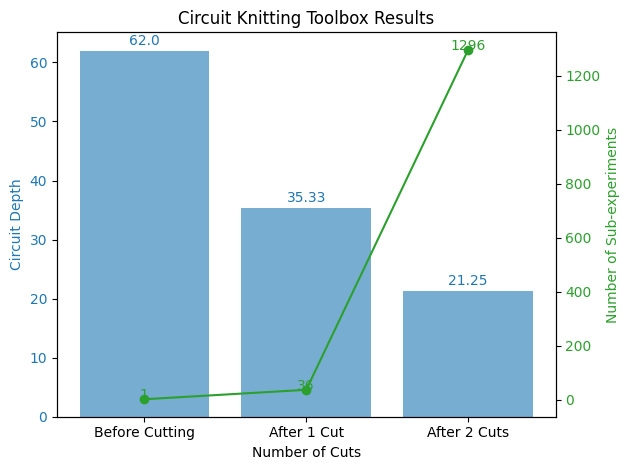

In [27]:
# Number of sub-experiments
num_sub_experiments_1_cut = len(sub_experiments)
num_sub_experiments_2_cut = len(sub_experiments_2)

# Data for plotting
categories = ['Before Cutting', 'After 1 Cut', 'After 2 Cuts']
depth_values = [isa_toffoli_depth, isa_qpd_toffoli_depth_mean, isa_qpd_toffoli_depth_2_mean]
num_sub_experiments = [1, num_sub_experiments_1_cut, num_sub_experiments_2_cut]

# Create figure and axis
fig, ax1 = plt.subplots()

# Plot depth values
color = 'tab:blue'
ax1.set_xlabel('Number of Cuts')
ax1.set_ylabel('Circuit Depth', color=color)
bars = ax1.bar(categories, depth_values, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', color=color, fontsize=10)

# Create a second y-axis to plot the number of subexperiments
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Number of Sub-experiments', color=color)
ax2.plot(categories, num_sub_experiments, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Add value labels on points
for i, num in enumerate(num_sub_experiments):
    ax2.text(i, num + 0.1, num, ha='center', color=color, fontsize=10)

# Add titles and labels
plt.title('Circuit Knitting Toolbox Results')
fig.tight_layout()  # Adjust layout to make room for both y-axes

# Show plot
plt.show()